# Cas d'usage n°3

Après récupération d'un arrêté "catastrophes naturelles", retrouver des codes communes à partir de libellés communaux et départementaux

## Import des modules

In [1]:
import os
import pandas as pd
from requests_cache import CachedSession

from french_cities import find_departements, find_city

## Récupération de l'arrêté "CATNAT" et chargement de l'annexe 1

L'arrêté CATNAT du 14 novembre 2023 est disponible à l'URL [suivante](https://www.legifrance.gouv.fr/jorf/id/JORFTEXT000048393151).
Il concerne des communes du Nord et du Pas-de-Calais.

In [2]:
url = "https://www.legifrance.gouv.fr/jorf/id/JORFTEXT000048393151"
s = CachedSession()
FIREFOX = (
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) "
    "Gecko/20100101 Firefox/126.0"
)
s.headers.update({"User-Agent": FIREFOX})
r = s.get(url)
df = pd.read_html(r.content, encoding="utf8")[0]
df

,Département,Commune,Phénomène naturel,Date de début de la période de reconnaissance,Date de fin de la période de reconnaissance,Nombre de reconnaissances au cours des 5 dernières années hors PPRN (article 3 de l'arrêté),Motivations de la décision
0,Nord,Arnèke,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...
1,Nord,Bavinchove,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...
2,Nord,Boeschepe,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...
3,Nord,Bourbourg,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...
4,Nord,Esquelbecq,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...
...,...,...,...,...,...,...,...
200,Pas-de-Calais,Wizernes,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...
201,Pas-de-Calais,Zoteux,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...
202,Pas-de-Calais,Zouafques,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...
203,Pas-de-Calais,Zudausques,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...


## Configuration de l'API INSEE

In [3]:
os.environ["insee_key"] = "********************"
os.environ["insee_secret"] = "********************"

## Reconnaissance des départements, puis des communes

In [4]:
df = find_departements(df, source="Département", alias="DEP_CODE", type_field="label")
df

,Département,Commune,Phénomène naturel,Date de début de la période de reconnaissance,Date de fin de la période de reconnaissance,Nombre de reconnaissances au cours des 5 dernières années hors PPRN (article 3 de l'arrêté),Motivations de la décision,DEP_CODE
0,Nord,Arnèke,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59
1,Nord,Bavinchove,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59
2,Nord,Boeschepe,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,59
3,Nord,Bourbourg,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,59
4,Nord,Esquelbecq,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59
...,...,...,...,...,...,...,...,...
200,Pas-de-Calais,Wizernes,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,62
201,Pas-de-Calais,Zoteux,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,62
202,Pas-de-Calais,Zouafques,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,62
203,Pas-de-Calais,Zudausques,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,62


In [5]:
df = find_city(
    df,
    x=False,
    y=False,
    dep="DEP_CODE",
    city="Commune",
    address=False,
    postcode=False,
    session=s,
)
df

,Département,Commune,Phénomène naturel,Date de début de la période de reconnaissance,Date de fin de la période de reconnaissance,Nombre de reconnaissances au cours des 5 dernières années hors PPRN (article 3 de l'arrêté),Motivations de la décision,DEP_CODE,insee_com
0,Nord,Arnèke,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59,59018
1,Nord,Bavinchove,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59,59054
2,Nord,Boeschepe,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,59,59086
3,Nord,Bourbourg,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,59,59094
4,Nord,Esquelbecq,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,59,59210
...,...,...,...,...,...,...,...,...,...
200,Pas-de-Calais,Wizernes,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,62,62902
201,Pas-de-Calais,Zoteux,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,62,62903
202,Pas-de-Calais,Zouafques,Inondations et coulées de boue,02/11/2023,12/11/2023,NaN,L'intensité anormale du phénomène durant l'évè...,62,62904
203,Pas-de-Calais,Zudausques,Inondations et coulées de boue,02/11/2023,12/11/2023,1.0,L'intensité anormale du phénomène durant l'évè...,62,62905


## Analyse des résultats

In [6]:
df["insee_com"].isnull().value_counts().to_frame("Code INSEE manquant")

,Code INSEE manquant
insee_com,
False,205


On a bien récupéré les codes officiels géographiques des 205 communes ciblées par l'arrêté.

Pour (par exemple) tracer une carte des communes concernées, on peut maintenant procéder comme suit :

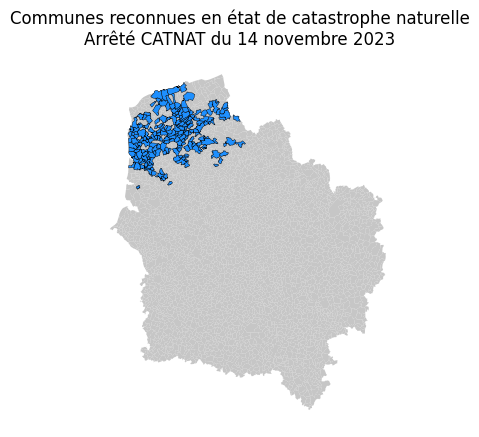

In [7]:
from pynsee.geodata import get_geodata
import geopandas as gpd
cities = gpd.GeoDataFrame(get_geodata("ADMINEXPRESS-COG-CARTO.LATEST:commune"))
cities = cities.merge(df, on="insee_com", how="left", indicator=True).query("insee_reg=='32'")
ax = cities.plot(edgecolor="none", alpha=.9, facecolor="silver")
cities[cities._merge=="both"].plot(edgecolor="black", facecolor="dodgerblue", ax=ax, linewidth=.3)
fig = ax.get_figure()
fig.suptitle("Communes reconnues en état de catastrophe naturelle\nArrêté CATNAT du 14 novembre 2023")
ax.set_axis_off()